## 선형회귀(lineare regression)

## feature (특징) =>
$$ y =ax +b $$
$$ 우리가 구하고자 하는것는 직선의 기울기(a) 와  y 절편(b) 구하고자 한다  $$ 
$$  (2 |  3)  => feature 는 2다  $$

$$ 기울기(a)가 2이고  y절편(b)가 1이라고 하자  $$
$$  2\times 1 + 1   $$
$$  2\times 2 + 1  $$
$$  2\times 3 + 1  $$
$$   J =(비용/COST/오차/에러) $$ 
$$  정답(y)와 모델에서 출력된 값(\widehat{y})의 차이(error)를 
제곱하고 제곱한 값을 학습데이터 전체를 다  더하고 그 데이터의
갯수로 나눈값을 말함$$
$$ 평균(mean)  $$ 
$$  제곱(square)  $$  
$$  J =  MSE  $$ 
$$ a \leftarrow a- \alpha \frac{\partial J}{\partial a} $$
training data 중 데이터 하나가 공간의 점(벡터) 이다
<table>
    <tr>
        <th>x1</th>
        <th>x2</th>
        <th>x3</th>
        <th>x4</th>
        <th>y(label/정답)</th>
    </tr>
    <tr>
        <td>1</td>
        <td>3</td>
        <td>6</td>
        <td>7</td>
        <td>70</td>
    </tr>
    <tr>
        <td>12</td>
        <td>45</td>
        <td>22</td>
        <td>15</td>
        <td>77</td>
    </tr>
    <tr>
        <td>13</td>
        <td>117</td>
        <td>113</td>
        <td>667</td>
        <td>17</td>
    </tr>
    <tr>
        <td>123</td>
        <td>112</td>
        <td>15</td>
        <td>6467</td>
        <td>777</td>
    </tr>
    <tr>
        <td>213</td>
        <td>1217</td>
        <td>1213</td>
        <td>6677</td>
        <td>755</td>
    </tr>
</table>
###  feature가 4개다 
$$ y = w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+b $$ 
$$ w_{1}, w_{2}, w_{3}, x_{4}가 feature가 되고 y가 정답(label) $$ 
$$ 우리가 찾고자 하는것은 뭘까?   $$ 
(3, 4, 6, 7 |  5) 
$$  우리가 구하고자 하는것은 w_{1}, w_{2}, w_{3}, x_{4} 과 b(bias.y 절편)     $$
training data(학습) 데이터는 5개이므로 5개의 점들과 $ \widehat{y} $ 과 거리의 제곱의 합을 5로 나눈평균이
코스트(비용/에러/오차/손실/LOSS) 이다

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv("50_Startups.csv")
df[:3]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [67]:
x = df.iloc[:,:-1].values # 칼럼(열) 중에서 맨 오른쪽 데이터 제외(정답)
y = df.iloc[:,-1].values # 가장 오른쪽 데이터(정답)

'State' 칼럼이 서로 다른 이름의 'New York', 'Florida' , 'California'을 가지고 있고
데이터 형태(text 형태) 를 숫자로 변화시키고자 함
첫번째 행이 State가 'New York'을 가지고 있다면 'New York' 칼럼만 1이 되고 나머지는
0이 되도록 함 (one hot encoding)

<a href="https://needjarvis.tistory.com/565"> one hot encoding</a>
<img src="2/one.png"/>

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

#### 데이터를 최소값에 빠르게 수렴하도록 하기 위해 값을 원형 형태로
#### 변형함

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

제공되는 excel 데이터를 학습 data와 test 데이터로 분리함

In [70]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [71]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

$$ \widehat{y} = w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+b $$

$$   MSE = \frac{1}{n}\sum_{i=1}^{n}(y-\widehat{y})^{2} $$ 

$$ 모델은 입력 데이터와 출력 데이터 사이의 선형 관계를 학습 $$

$$ 직선의방정식, 선형 회귀 모델의 예측값 \widehat{y}를 나타냄 $$
$$ \widehat{y} = wx + b $$ 

$$ MSE $$
$$ J = \frac{1}{n}\sum_{i=0}^{n}(y - \widehat{y})^2 $$

$$  가중치 w에 대한 평균 제곱 오차의 미분, 손실함수조절 $$
$$ \frac{\partial J}{\partial w} = -\frac{2}{n}\sum_{i=0}^{n}(y - \widehat{y})x $$
$$ 편향 b에 대한 평균 제곱 오차의 미분, 손실함수조절 $$
$$ \frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=0}^{n}(y - \widehat{y}) $$

$$ 경사 하강법(Gradient Descent)을 사용하여 가중치 w를 업데이트하는 식 $$
$$ \alpha는 학습률(learning rate)로, 가중치 업데이트의 크기를 제어 $$
$$ w \leftarrow w - \alpha \frac{\partial J}{\partial w} $$
$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

In [72]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [73]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 6989316078.6237135
Cost is: 93910079.25025299
Cost is: 52213406.460179575
Cost is: 44053387.931024216
Cost is: 41718884.293359876
Cost is: 41048136.36983321
Cost is: 40855409.298071906
Cost is: 40800032.69430475
Cost is: 40784121.238607384
Cost is: 40779549.37241818


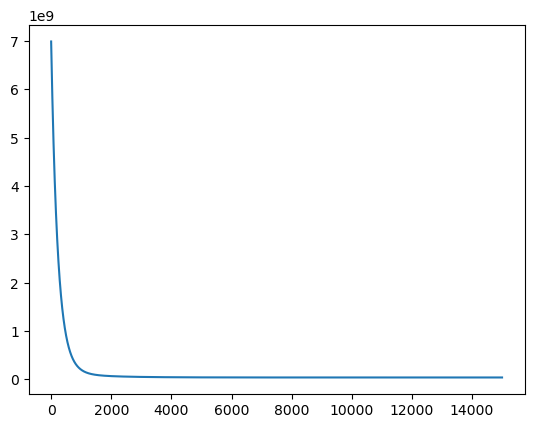

In [74]:
plt.plot(c)

In [3]:
a=10000 # 초기값
b= 2000 #초기값 
alpha =0.01
for i in range(8000):
    y_hat = w1*x1+w2*x2+w3*x3+w4*x4+ b
    w1= w1 - alpha*derivatived_cost(y,y_hat,x1,1)
    w1= w1 - alpha*derivatived_cost(y,y_hat,x2)
    b= b - alpha*derivatived_cost(y,y_hat,False)
    if i%1000:
        print('step: ',i ,'a:',a, 'b:',b)

NameError: name 'x' is not defined

In [1]:
import numpy as np

In [2]:
x= np.array([1,2,3]) #feature
y= np.array([3,5,7]) #label정답 

$$  \lim_{h\rightarrow0} \frac{f(x+h)-f(x)}{h}    $$

In [3]:
def derivative(f, x):
    h=0.000001
    return f(x+h)/f(x)

In [14]:
def cost_a(x_,y_,a):
    print('here is cost_a', x_,y_, a)
    sum_=0
    for i,j in zip(x_,y_):
        sum_+= (j-i)
        sum_*=a
    return sum_/len(x_)

In [15]:
def cost_b(x_,y_):
    print('here is cost_b')
    sum_=0
    for i,j in zip(x_,y_):
        sum_+= (j-i)
    return sum_/len(x_)

In [16]:
a=100 # 초기값
b= 20 #초기값 
alpha =0.01
for i in range(10000):
    cost_a =  cost_a(x,y,a)
    cost_b =  cost_b(x,y)
    a= a - alpha*cost_a 
    b= b - alpha*cost_b
    if i%1000:
        print('a:',a, 'b:',b,'cost_a:',cost_a , 'cost_b:',cost_b)

here is cost_a [1 2 3] [3 5 7] 100
here is cost_b


TypeError: 'numpy.float64' object is not callable